**Importando dados do site IBGE**

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

def pega_dados_estado(uf: str) -> dict: #Essa função importa os dados dos estados e retorna um dicionário
  print('Pegado dados do estado de', {uf})
  estado_url = f'https://www.ibge.gov.br/cidades-e-estados/{uf}.html'
  page = requests.get(estado_url)

  soup = BeautifulSoup(page.content, 'html.parser')
  dadoss = soup.select('.indicador') #Seleciona a classe indicador. Coloca o "." . para dizer que é uma classe
  estado_dict = {                    #Cria um dicionário chave é ind_label e valor é ind-value
      ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
      for ind in dadoss
  }
  estado_dict['Estado'] = uf
  
  return estado_dict

In [2]:
#Chama a Função pega_dados_estados passando os estados por parametro e coloca em um Data Frame
estados = ['AC','AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC','SP', 'SE', 'TO']

dados_estados = [pega_dados_estado(uf) for uf in estados]
df = pd.DataFrame(dados_estados)

Pegado dados do estado de {'AC'}
Pegado dados do estado de {'AL'}
Pegado dados do estado de {'AP'}
Pegado dados do estado de {'AM'}
Pegado dados do estado de {'BA'}
Pegado dados do estado de {'CE'}
Pegado dados do estado de {'DF'}
Pegado dados do estado de {'ES'}
Pegado dados do estado de {'GO'}
Pegado dados do estado de {'MA'}
Pegado dados do estado de {'MT'}
Pegado dados do estado de {'MS'}
Pegado dados do estado de {'MG'}
Pegado dados do estado de {'PA'}
Pegado dados do estado de {'PB'}
Pegado dados do estado de {'PR'}
Pegado dados do estado de {'PE'}
Pegado dados do estado de {'PI'}
Pegado dados do estado de {'RJ'}
Pegado dados do estado de {'RN'}
Pegado dados do estado de {'RS'}
Pegado dados do estado de {'RO'}
Pegado dados do estado de {'RR'}
Pegado dados do estado de {'SC'}
Pegado dados do estado de {'SP'}
Pegado dados do estado de {'SE'}
Pegado dados do estado de {'TO'}


**Importando dados do site da B3**

In [3]:
!pip install -q kora

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 


In [4]:
from kora.selenium import wd  #Kora selenium é para usar no Colab posso usar no selenium quando for localmente
from time import sleep
import pandas as pd

url = "https://sistemaswebb3-listados.b3.com.br/investorProfilePage/state?language=pt-br"
wd.get(url)
sleep(8)

wd.find_element_by_xpath('//*[@id="divContainerIframeB3"]/app-state/div/div/app-download/div/div/div/div[1]/div[2]/p/a').click()

sleep(5)
caminho = '/content/'
arquivos = !ls -1t *.csv
arquivos = caminho + arquivos[0]
a = arquivos.replace("'","")
arquivo = pd.read_csv(a, sep='|', encoding='ISO-8859-1', skipfooter=1, engine='python', skiprows=2) #skipfooter igniora as linhas abaixo skipfooter ignora a linhas acima
a = arquivo.copy()

**Tratando dados IBGE**

In [5]:
uf_ibge = df.copy() #Faz uma cópia do DataFrame
uf_ibge.columns = ['Governador','Capital','Gentilico','Area','Populacao','Densidade_demo','Matr_ensi_fundamental','Idh','Receitas','Despesas','Renda','Veiculos','Estado']
uf_ibge = uf_ibge[['Estado','Area','Populacao','Densidade_demo','Idh','Renda','Veiculos']]

uf_ibge = uf_ibge.replace({  #substitui a lista no Dataframe
    '\.':'',   #\. pq o . é um caracterer especial
    ',':'.',
    '\[\d+\]':'',   #Substitui todos numeros d+ (0-9) e as [] por vazio ''
    'km²':'',
    'pessoas':'',
    'hab/':'',
    'R\$':'',
    'veículos':''
},regex=True)

#Convertendo as colunas numéricas em um tipo nemérico do DtaFrame

#Criei um lista com as colunas que vão ser numéricas
numericas = ['Area','Populacao','Densidade_demo','Idh','Renda','Veiculos']
uf_ibge[numericas] = uf_ibge[numericas].apply(lambda x: x.str.strip())  #Aplicando a função strip que tira os espaços na borda das strings
uf_ibge[numericas] =  uf_ibge[numericas].apply(pd.to_numeric) #Converte as colunas numéricas em um tipo numérico
uf_ibge

,Estado,Area,Populacao,Densidade_demo,Idh,Renda,Veiculos
0,AC,164173.431,894470,4.47,0.663,917,306258
1,AL,27830.656,3351543,112.33,0.631,796,930933
2,AP,142470.762,861773,4.69,0.708,893,215330
3,AM,1559167.878,4207714,2.23,0.674,852,969722
4,BA,564760.427,14930634,24.82,0.660,965,4506825
5,CE,148894.442,9187103,56.76,0.682,1028,3395382
6,DF,5760.784,3055149,444.07,0.824,2475,1934210
7,ES,46074.447,4064052,76.25,0.740,1347,2078459
8,GO,340242.854,7113540,17.65,0.735,1258,4203370
9,MA,329651.495,7114598,19.81,0.639,676,1855570


**Tratando dados B3**

In [6]:
invest_brasil = a.copy()
invest_brasil.columns = ['Estado', 'Homens', 'Mulheres', 'Total_invest', 'BilhHomens', 'BilhMulheres', 'BilhTotal', 'Percentual'] #renomeia colunas
invest_brasil = invest_brasil[['Estado', 'Total_invest']]
invest_brasil

,Estado,Total_invest
0,SP,1452860
1,RJ,392217
2,MG,377515
3,RS,213818
4,PR,241618
5,SC,185952
6,DF,125080
7,BA,124774
8,CE,74896
9,ES,77499


**Agrupando Base de dados**

In [7]:
dados = pd.merge(uf_ibge, invest_brasil, on='Estado') #Agrupar tabela por Estado por padrão inner join
dados['Perc_invest'] = round(((dados['Total_invest']/ dados['Populacao']) * 100),3)
dados


,Estado,Area,Populacao,Densidade_demo,Idh,Renda,Veiculos,Total_invest,Perc_invest
0,AC,164173.431,894470,4.47,0.663,917,306258,5267,0.589
1,AL,27830.656,3351543,112.33,0.631,796,930933,20990,0.626
2,AP,142470.762,861773,4.69,0.708,893,215330,4281,0.497
3,AM,1559167.878,4207714,2.23,0.674,852,969722,26968,0.641
4,BA,564760.427,14930634,24.82,0.660,965,4506825,124774,0.836
5,CE,148894.442,9187103,56.76,0.682,1028,3395382,74896,0.815
6,DF,5760.784,3055149,444.07,0.824,2475,1934210,125080,4.094
7,ES,46074.447,4064052,76.25,0.740,1347,2078459,77499,1.907
8,GO,340242.854,7113540,17.65,0.735,1258,4203370,92201,1.296
9,MA,329651.495,7114598,19.81,0.639,676,1855570,29491,0.415


**Analisando e plotando gráficos**

Nos gráficos abaixo observa-se que os três estados com mais investidores são: Brasília (4.09%), São Paulo(3.13%) e Santa Catarina (2.56%).

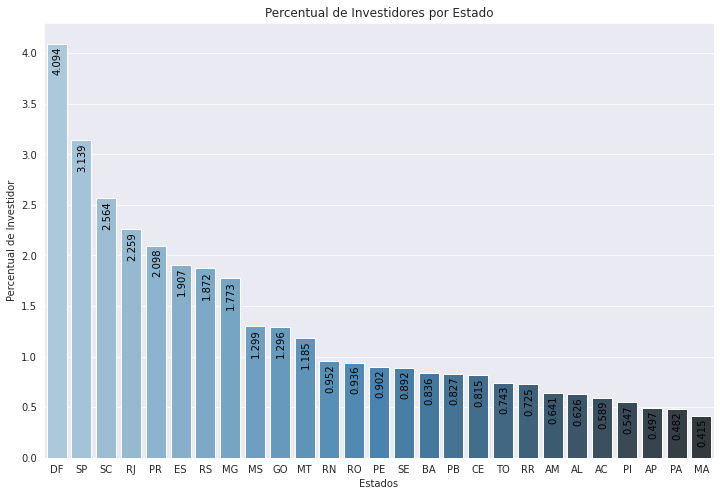

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def autolabel(invest):  #Função para colocar rótuno nas colunas
  for i in ax.patches:
    ax.annotate(i.get_height(), 
                ( i.get_x(), i.get_height()), 
                #ha='center',  va='center', i.get_x() + i.get_height()/2
                fontsize='10', color='black', rotation='90', xytext=(6,-29), textcoords='offset points')

plt.figure(figsize=(12,8))
sns.set_style("dark")
ax = sns.barplot(
data = dados.sort_values(['Perc_invest'], ascending=False), 
x = 'Estado' ,
y = 'Perc_invest', palette='Blues_d')
autolabel(ax)
ax.set_xlabel('Estados')
ax.set_ylabel('Percentual de Investidor')
ax.set(title = 'Percentual de Investidores por Estado')
ax.grid(axis='y');


In [9]:
pip install geopandas geobr

     |████████████████████████████████| 1.0MB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.4MB 199kB/s 
     |████████████████████████████████| 6.6MB 46.0MB/s 
  Created wheel for geobr: filename=geobr-0.1.9-cp37-none-any.whl size=35289 sha256=1d8abbf1a4c8aaf8aef9bf64be3b4d7286398248d9a73d4be227dbafe60f99a6
  Stored in directory: /root/.cache/pip/wheels/7a/71/52/488097898ef79ef529b7edf36c3f8ddaa3748b35da889daf8b
Successfully built geobr
ERROR: geobr 0.1.9 has requirement Shapely==1.7.0, but you'll have shapely 1.7.1 which is incompatible.


In [10]:
import geopandas as gpd
import geobr
from geopandas import GeoDataFrame

br_uf = geobr.read_state()
br_uf.head()

mapa = pd.merge(dados, br_uf, left_on='Estado', right_on='abbrev_state') 
mapa = mapa[['geometry','Perc_invest']]
mapa = GeoDataFrame(mapa)

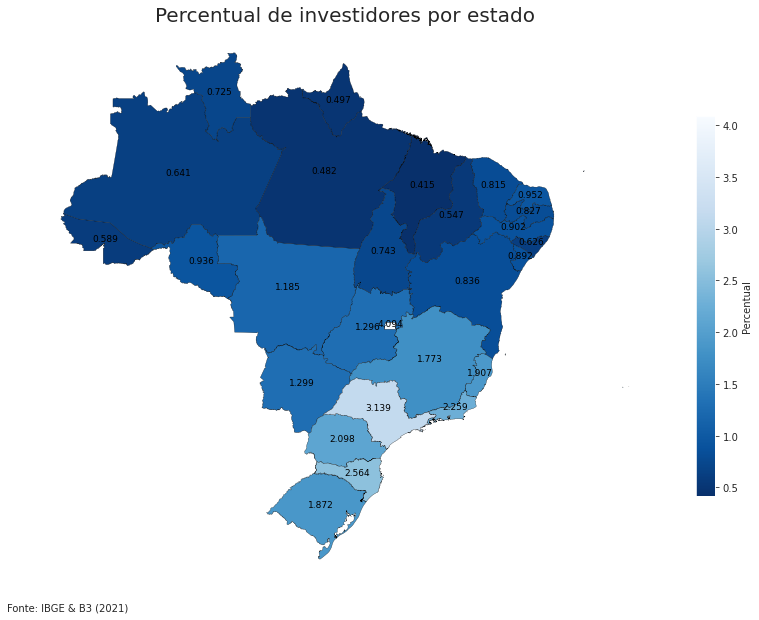

In [11]:
f, ax = plt.subplots()
f.set_size_inches(14,14)
mapa.plot(
ax=ax, # Axis de destino do gráfico
column='Perc_invest', # Coluna com os valores usados para colorir o mapa
cmap="Blues_r", # Mapa de cores
edgecolor="black", # Cor dos contornos
legend=True,
legend_kwds={
        "label": "Percentual",
        "orientation": "vertical",
        "shrink": 0.5,},
linewidth=0.25, # Espessura dos contornos
)
mapa.apply(lambda x: ax.annotate(s=x.Perc_invest, xy=x.geometry.centroid.coords[0], ha='center', fontsize='9', color='black',),axis=1) #label
ax.set_title(
    "Percentual de investidores por estado",
    fontdict={"fontsize": 20},
)
f.text(
    0.10,                  # Posição x
    0.20,                  # Posição y
    "Fonte: IBGE & B3 (2021)"  # Texto
)
ax.axis("off");          # Remove os eixos

Com o mapa de calor, através do coeficiente de correlação de Pearson, foi possível identificar qual atributo está mais relacionado com o "Percentual de Investidores".

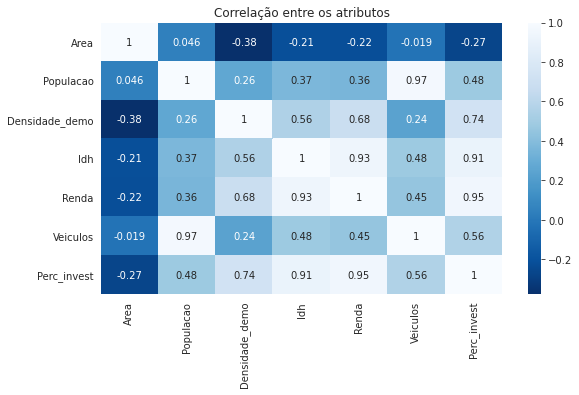

In [20]:
corr = dados.drop(columns=['Total_invest']).corr()
plt.figure(figsize=(9,5))
ax = sns.heatmap(corr, annot=True, cmap= 'Blues_r');

ax.set_title('Correlação entre os atributos')
plt.show()



Com modelos de regressão simples é possível checar se existe alguma correlação entre algumas variáveis. Assim nos permite visualizar se existe uma correlação positiva entre as variáveis e se os pontos se aproximam muito dessa linha de regressão.

No gráfico abaixo fica claro que existe uma correlação positiva entre os atributos Percentual de Ivestidores e Renda per capita.

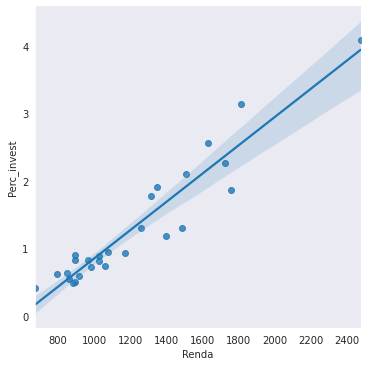

In [24]:

#Essa não é uma regressão do nosso conjunto de dados, está sendo mostrado apenas a relação entre esses dados.
corr = dados.drop(columns=['Total_invest']).corr()
ax = sns.lmplot(x='Renda', y='Perc_invest' , data=dados, palette='Blues_d');


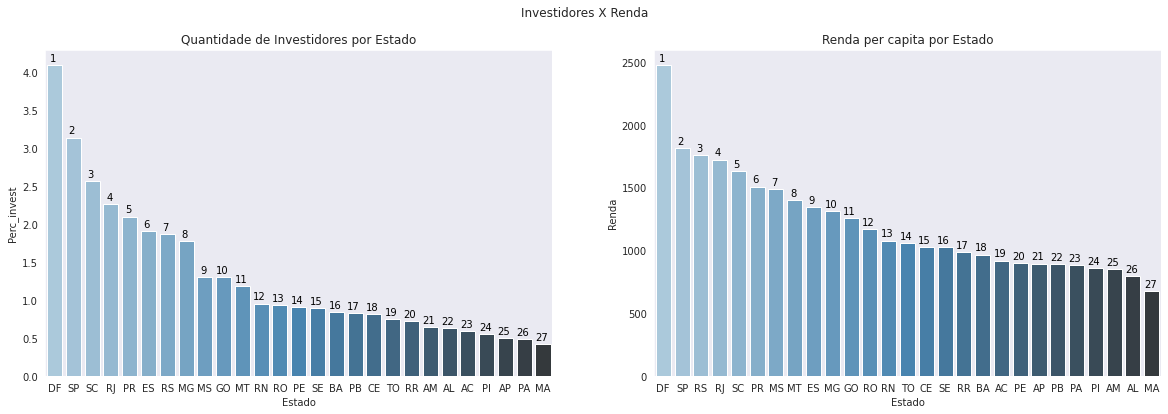

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,6) )

def autolabel(invest):
  for i in ax.patches:
    ax.annotate(ax.patches.index(i)+1, 
    ( i.get_x(), i.get_height()), 
    ha='center',  va='top', 
    fontsize='10', color='black', xytext=(6,12), textcoords='offset points')

def autolabel1(invest):
  for i in ax1.patches:
    ax1.annotate(ax1.patches.index(i)+1, 
    ( i.get_x(), i.get_height()), 
    ha='center',  va='top', 
    fontsize='10', color='black', xytext=(6,12), textcoords='offset points')
fig.suptitle('Investidores X Renda')

ax = sns.barplot(ax=axes[0],
data = dados.sort_values(['Perc_invest'], ascending=False), 
x = 'Estado' ,
y = 'Perc_invest', palette='Blues_d')
axes[0].set_title('Quantidade de Investidores por Estado')
autolabel(ax)

ax1 = sns.barplot(ax=axes[1],
data = dados.sort_values(['Renda'], ascending=False),
x = 'Estado' ,
y = 'Renda', palette='Blues_d')
axes[1].set_title('Renda per capita por Estado');
autolabel1(ax1)

**Conclusão**

Considerando que a quantidade de investidores por estado está fortemente relacionado com a renda pec capita por estado, podemos concluir que existem alguns estados que tem um grande potencial para inclusão de novos investidores. Observando o gráfico anterior, o estado do Rio Grande do sul (RS), por exemplo, está entre os três (3)estados com a melhor renda per capita, entretanto, encontra-se na sétima (7) posição entre os estados com mais investidores. 
No gráfico anteiror observa-se outros estados com um grande potencial no aumento de investidores. 

